# Spam Classifier With NLP(TD-IDF)
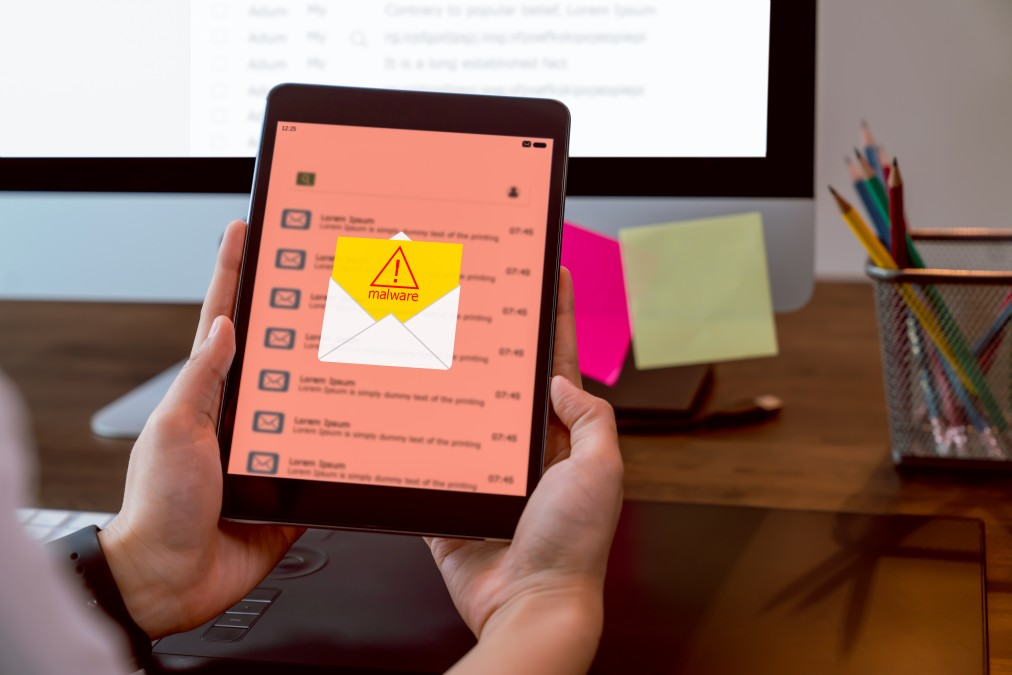

We got an accuracy of 97% by using NLP technique TD-IDF vectorizer and machine learning model Naive Bayes classifier

In [1]:
import pandas as pd
messages= pd.read_csv('SMSSpamCollection',sep='\t',names=['label','message']) #data is seperate by tab, we give the columns names as well
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Text cleaning and preprocessing
You and I would have understood that sentence in a fraction of a second. But machines simply cannot process text data in raw form. They need us to break down the text into a numerical format that’s easily readable by the machine (the idea behind Natural Language Processing!).

BoW/TF-IDF is uded to convert text into numeric vector
- Step1: preprocess and remove [,./?} ] these fullstop
- step2: Lower the text
- step3: create lemmatization/stemning
- step4: remove stopwords from text
- step5: Creating the TF-IDF model

In [2]:
# We will clean the text by using these library:
import re   # regular expression
from nltk.corpus import stopwords # for removing stopwords from sentences
from nltk.stem.porter import PorterStemmer  #for stemning-- it will not make sentences into proper meaningful sentences 
from nltk.stem import WordNetLemmatizer   # for lemmatization- to make sentence in proper meaning

In [3]:
# inisiting objects for lemmantization and stemning
ps = PorterStemmer()
wordnet=WordNetLemmatizer()


In [4]:
corpus = []  #after cleaning the text i will store the text into corpus, then we will the difference b/w sentences and corpus
for i in range (len(messages)): # Here i am iterating through each and every sentence which is range 0-31, so this loop will 31 times run
    review= re.sub('[^a-zA-Z]',' ',messages['message'][i]) # re.sub is function to remove fullstop,? - I am removing all puncuation marks with spaces apart from a-zA-Z, in each and every sentences 
    review= review.lower() # lowering each and every sentences 
    review= review.split() # for splitting to get list of the words
    review= [wordnet.lemmatize(word) for word in review if word not in set(stopwords.words('english'))] # if the word in not present in senetence we will lemmantization
    review= ' '.join(review) # finally joining all the list of review into review
    corpus.append(review)  # appending to the corpus list

In [5]:
print(corpus)

['go jurong point crazy available bugis n great world la e buffet cine got amore wat', 'ok lar joking wif u oni', 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply', 'u dun say early hor u c already say', 'nah think go usf life around though', 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv', 'even brother like speak treat like aid patent', 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune', 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour', 'mobile month u r entitled update latest colour mobile camera free call mobile update co free', 'gonna home soon want talk stuff anymore tonight k cried enough today', 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info', 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw', 'searching

In [6]:
print(messages['message'])

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object


## Creating TF-IDF model
We can now compute the TF-IDF score for each word in the corpus. Words with a higher score are more important, and those with a lower score are less important:
- Bag of Words just creates a set of vectors containing the **count of word** occurrences in the document (reviews), while the TF-IDF model contains information on the **more important words and the less important** ones as well.

But In case it does not affect the accuracy if we used Bag of Words as well

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer # for creating numerical vector 
cv= TfidfVectorizer(max_features=5000) #we know that some of word repeating so, we will take most frequent words 
X= cv.fit_transform(corpus).toarray() # so this is my X features of the dataset

In [8]:
#lets look at shape of documents matix
X.shape # to find dimension in numpy array

(5572, 5000)

In [9]:
# now we have to take out dependent variables which is in text form, for machine to understand we will convert into
# dummies variables of my dependet variables 
y=pd.get_dummies(messages['label'],drop_first=True)
#y=y.iloc[:,1].values #We have take only one column to avoid dummy variables trap

In [10]:
y.value_counts() #imbalance dataset

spam
0       4825
1        747
dtype: int64

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

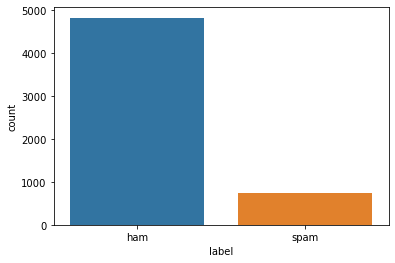

In [11]:
import seaborn as sns
sns.countplot(messages['label'])

In [12]:
# tain test split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)


In [13]:
# Here we will use Naive bayes classification model, because it works really well with text data specially in NLP
from sklearn.naive_bayes import MultinomialNB
spam_detect_model= MultinomialNB().fit(X_train,y_train)

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [14]:
y_pred=spam_detect_model.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy= accuracy_score(y_test,y_pred)
print(accuracy)
report= classification_report(y_test,y_pred)
print(report)

[[955   0]
 [ 26 134]]
0.9766816143497757
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       955
           1       1.00      0.84      0.91       160

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

